# BIKE SHARING ASSIGNMENT

## UPGRAD IIITB EPGP in ML & AI - MLC39

#### By: 
 - PADMAVATHI D

## INTRODUCTION

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## PROBLEM STATEMENT

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

     - Which variables are significant in predicting the demand for shared bikes.
     - How well those variables describe the bike demands
     
## BUSINESS GOAL
 
 
-  Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## ANALYSIS APPROACH

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.


## IMPORTING PACKAGES

In [1]:
#imporitng the required packages & libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Adjusting screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## LOADING THE DATASET 

In [2]:
#Read the csv file using pandas
df_bikeSharing = pd.read_csv("day.csv")

In [3]:
#Have a look at the data
df_bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## DESCRIPTION OF THE DATATSET  
  
  
  - instant: record index
  - dteday : date
  - season : season (1:spring, 2:summer, 3:fall, 4:winter)
  - yr : year (0: 2018, 1:2019)
  - mnth : month ( 1 to 12)
  - holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  - weekday : day of the week
  - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
  + weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - temp : temperature in Celsius
  - atemp: feeling temperature in Celsius
  - hum: humidity
  - windspeed: wind speed
  - casual: count of casual users
  - registered: count of registered users
  - cnt: count of total rental bikes including both casual and registered
	

In [4]:
#To check the number of rows & columns present in dataset
print(df_bikeSharing.shape)

(730, 16)


#### Observations
- The dataset comprises of **730 rows** and **16 columns**

In [5]:
#To check features present in dataset
print(df_bikeSharing.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [6]:
#To check the size of data
df_bikeSharing.size

11680

In [7]:
df_bikeSharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
#To check the axes of data
df_bikeSharing.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [9]:
#To check the dimensions of data
df_bikeSharing.ndim

2

In [10]:
#To check the values of data
df_bikeSharing.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [11]:
#To check the details of numeriacl data
df_bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
#To check dataframe for null and datatype 
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observations
- In the bikesharing dataset, there are 

  - **4 features of float type**
  - **11 features of integer type**
  - **1 feature of object type**


In [13]:
#DUPLICATE CHECKING
# Creating a copy of original dataframe for duplicate check
df_bikeSharing_dup = df_bikeSharing.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_bikeSharing_dup.drop_duplicates(subset=None, inplace=True)

In [14]:
df_bikeSharing_dup.shape

(730, 16)

In [15]:
df_bikeSharing.shape

(730, 16)

#### Observations

- We can observe that there are no duplicates present in the bike sharing dataset.

## DATA CLEANING

### Handling Missing Values


In [16]:
#To check for null values
df_bikeSharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observations
- There are **no null values** in any of the features in the bikesharing dataset.

### Removing redundant & unwanted features

- Dropping the instant, dteday, casual and registered features

  - instant is only an index value & just a row instance identifier.
 
 - dteday is removed as we have some of date features like mnth and year and weekday already in other features and also for this analysis we will not consider day to day trend in demand for bikes.
 
 - casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way, cnt(i.e. target) = casual + registered, which leads to data leakage.Both these features contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two features. More over, we have created a new variable to have the ratio of these customer types.

In [17]:
#from the dataset, we can observe that instant is an index column so we drop it
df_bikeSharing.drop(['instant'],axis=1,inplace=True)

In [18]:
df_bikeSharing.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [19]:
#from the dataset, we can observe featues dteday and yr month are having same data so we can drop dteday to avoid confusion

df_bikeSharing.drop(['dteday'],axis=1,inplace=True)
df_bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
#from the dataset, we can observe casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
df_bikeSharing.drop(['casual','registered'],axis=1,inplace=True)
df_bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
#To check for datatypes
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Observations
- In the bikesharing dataset, there are 

  - **4 features of float type**
  - **8 features of integer type**

In [22]:
df_bikeSharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [23]:
df_bikeSharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [24]:
df_bikeSharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


#### Observations

 - we can observe that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories

### Handling Outliers

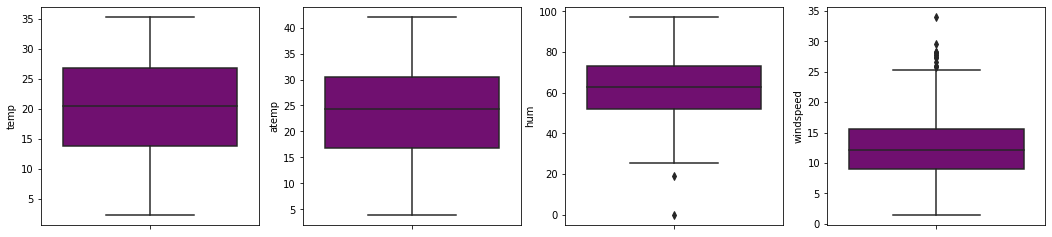

In [25]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_bikeSharing, color='purple')
    i+=1

#### Observations

 - From the above plots, we can observe that there are no outliers to be handled. We are good with not having any outliers in the data set.

## EXPLORATARY DATA ANALYSIS

In [26]:
#Replacing the values in season feature
df_bikeSharing['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df_bikeSharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [27]:
#Replacing the values in weathersit feature
df_bikeSharing['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df_bikeSharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [28]:
#Replacing the values in weekday feature
df_bikeSharing['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df_bikeSharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [29]:
#To check for datatypes
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


#### Observations
- In the bikesharing dataset, there are 

  - **4 features of float type**
  - **5 features of integer type**
  - **3 features of object type**

In [30]:
#changing datatypes of numerical features to appropriate types
df_bikeSharing[['temp','atemp','hum','windspeed','cnt']]=df_bikeSharing[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [31]:
df_bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


#### Observations
- In the bikesharing dataset, there are 

  - **4 features of float type**
  - **5 features of integer type**
  - **3 features of object type**

### Visualize Heatmap of correlation between variables

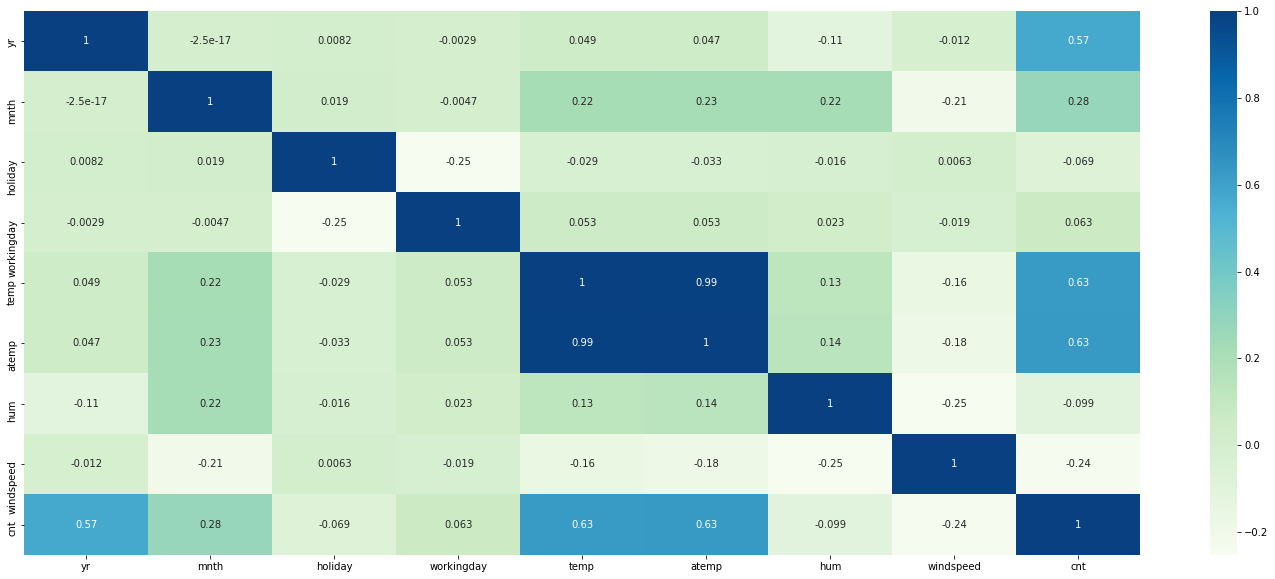

In [33]:
#Calculate Correlation
corr = df_bikeSharing.corr()
plt.figure(figsize=(25,10))

#Visualization of Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='GnBu' )
plt.show()

#### Observations

We can observe the followings from the correlation map, 

- temp and atemp seems to be highly correlated and only variable should be considered for the model. However let us eleminate it based on the Variance Inflation Factor later during the model building.

- We can observe that the Target variable has a linear relationship with some of the indeptendent variables which is a Good sign for building a linear regression Model.

### Visualization of Pair Plots to understand the linear relationship

<Figure size 1080x2160 with 0 Axes>

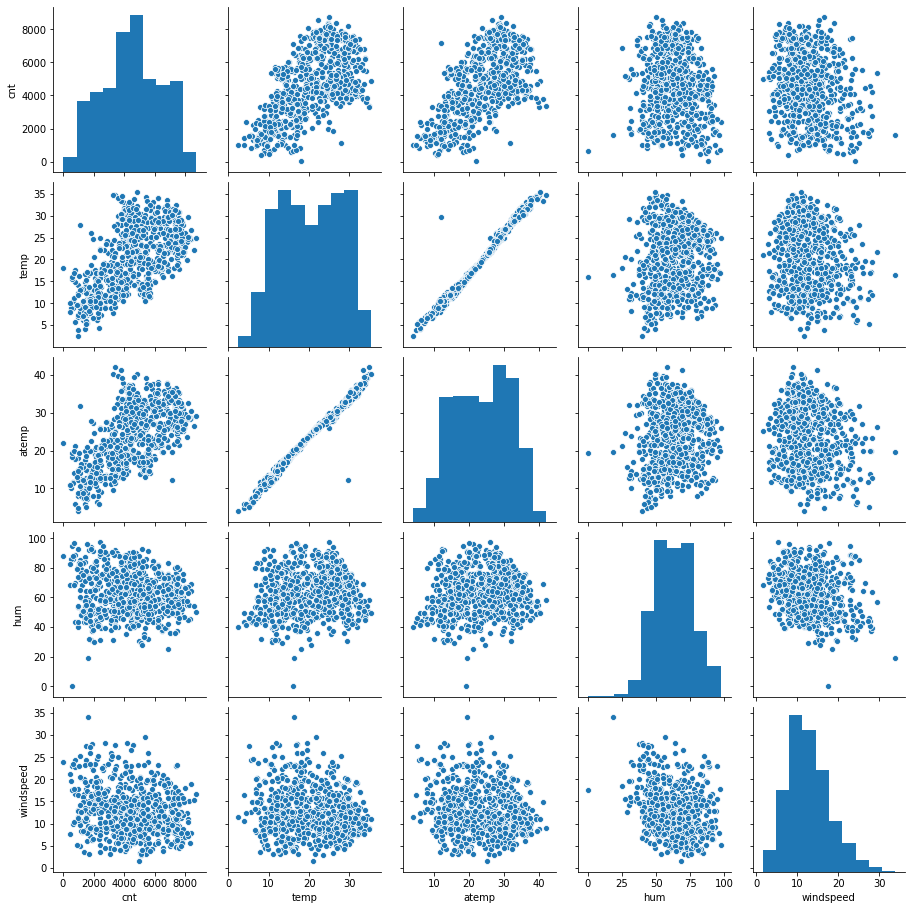

In [34]:
#Visualization of pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bikeSharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Observations

- We can observe that the temp and atemp has the highest corelation with the target variable cnt
- We can observe that temp and atemp are highly co-related with each other
- Thus from the above correlation map, we can observe that the output variable has a linear relationship with variables like temp, atemp.

### Visualization inorder to understand the correlation between the numerical variables

<Figure size 1440x1080 with 0 Axes>

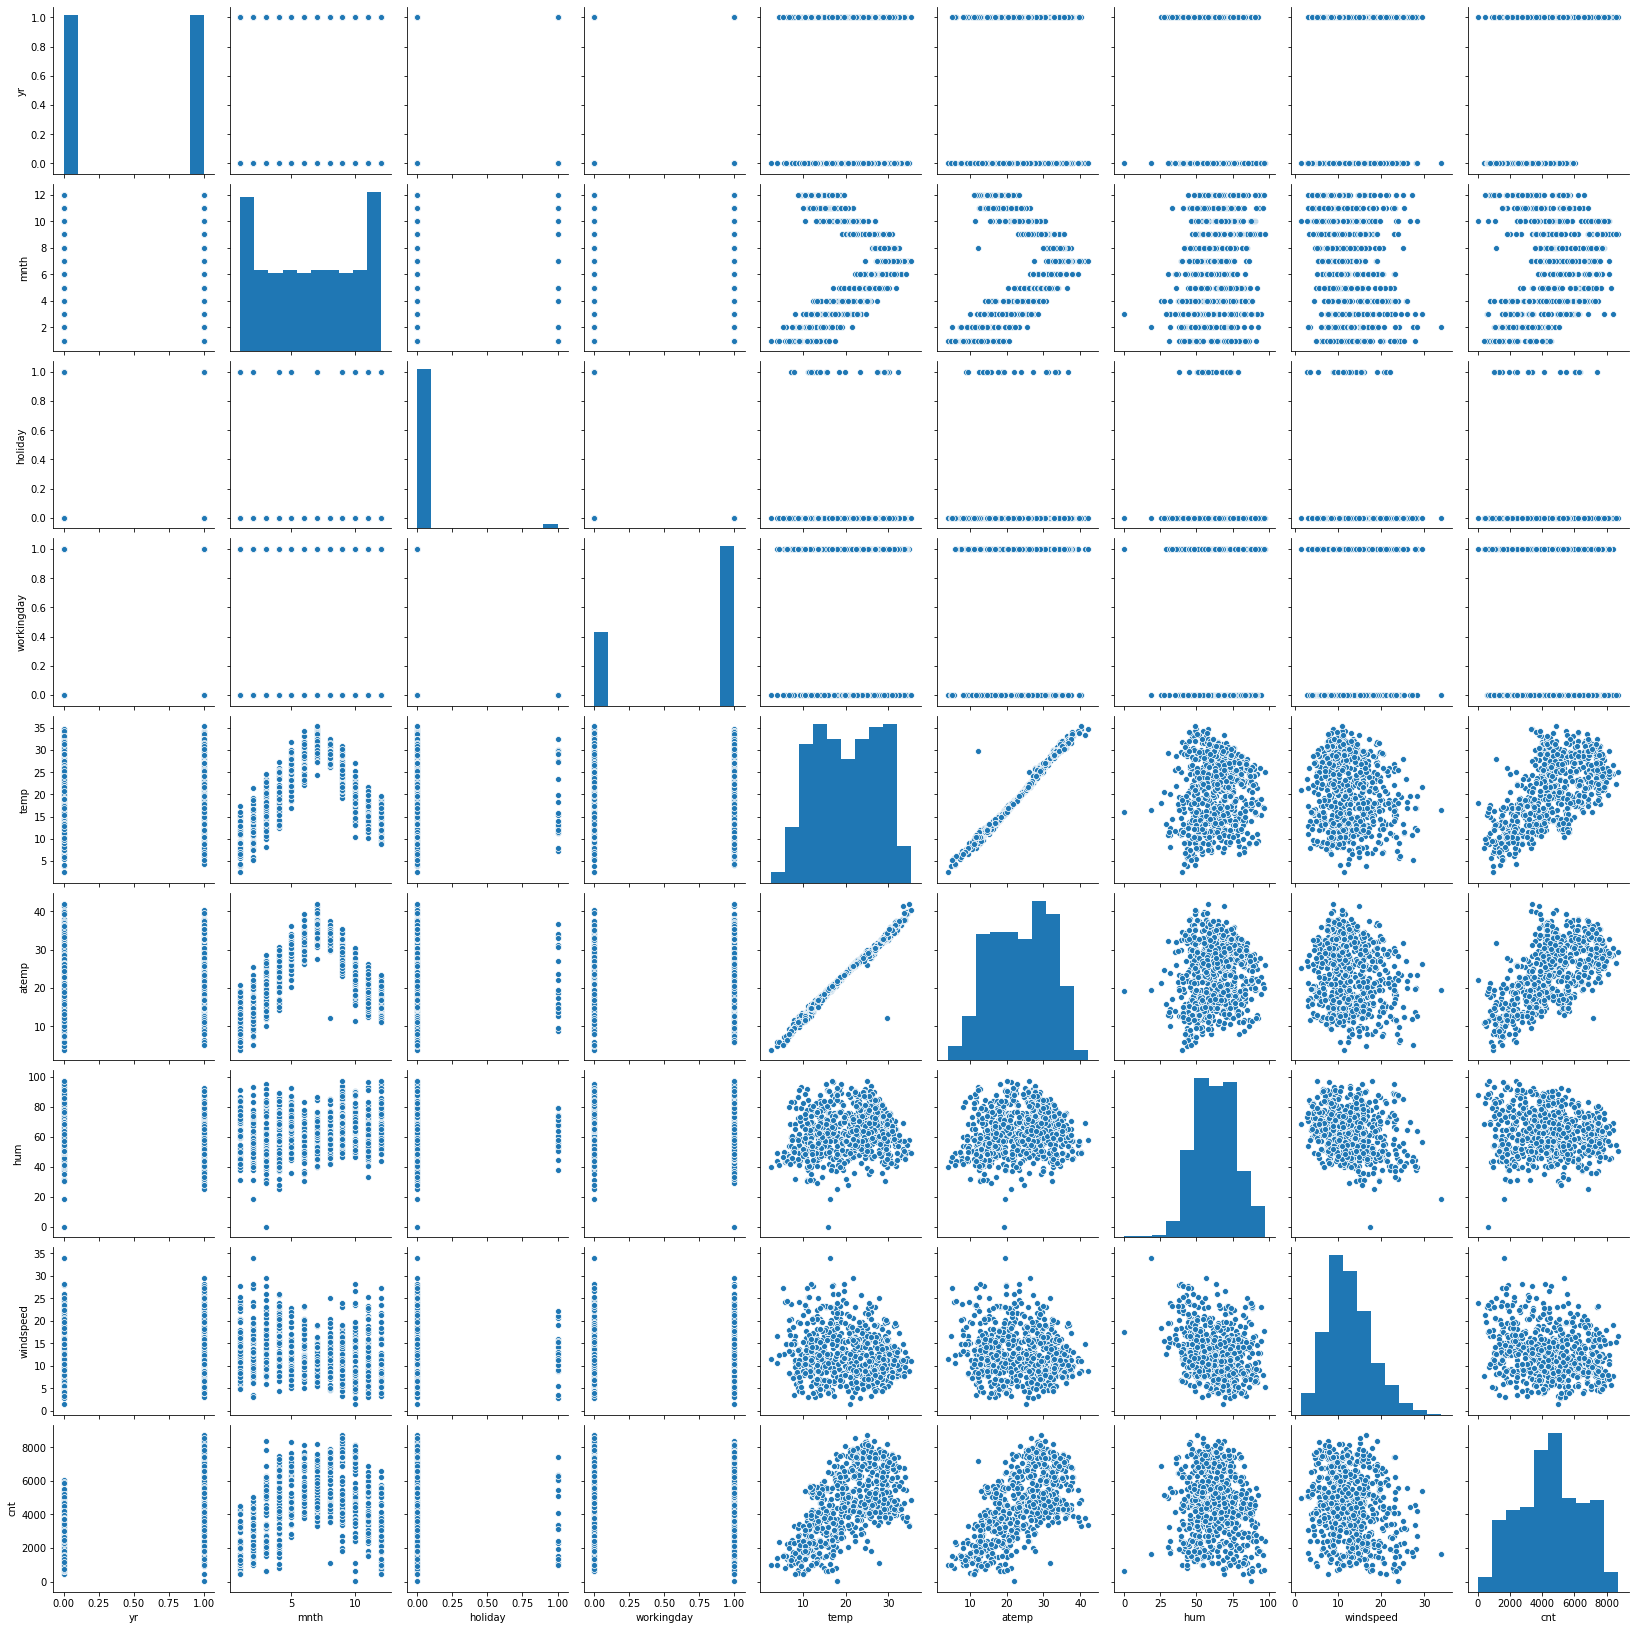

In [35]:
#Visualization of pairplots inorder to understand the correlation between the numerical variables 
plt.figure(figsize=(20,15))
sns.pairplot(df_bikeSharing)
plt.show()

### Visualization of Numeric features with target variables

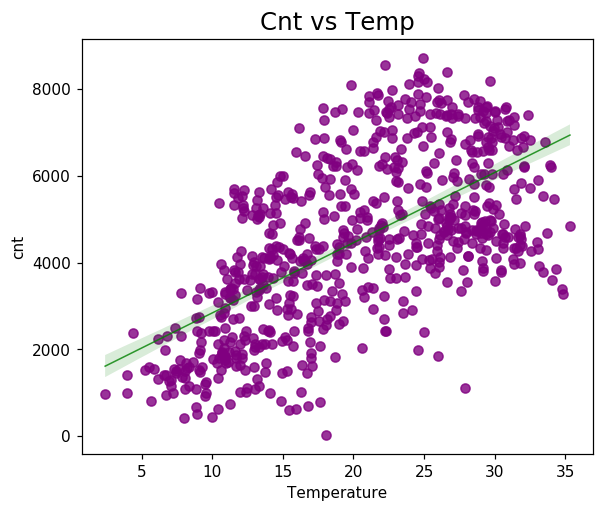

In [36]:
#Visualization of Cnt vs Temperature
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df_bikeSharing,y="cnt",x="temp",color="purple",line_kws={'color': 'green', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Temperature")
plt.show()

#### Observations

- We can observe that the Demand for bikes is positively correlated to temp.
- We can also observe that cnt is linearly increasing with temp indicating linear relation.

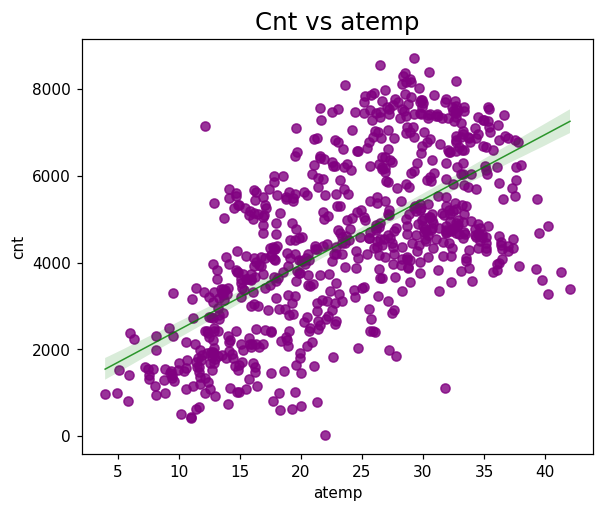

In [37]:
#Visualization of Cnt vs atemp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs atemp",fontsize=16)
sns.regplot(data=df_bikeSharing,y="cnt",x="atemp",color="purple",line_kws={'color': 'green', 'lw': 1, 'alpha': 0.8})
plt.xlabel("atemp")
plt.show()

#### Observations

- We can observe that the Demand for bikes is positively correlated to atemp.
- We can also observe that cnt is linearly increasing with atemp indicating linear relation.

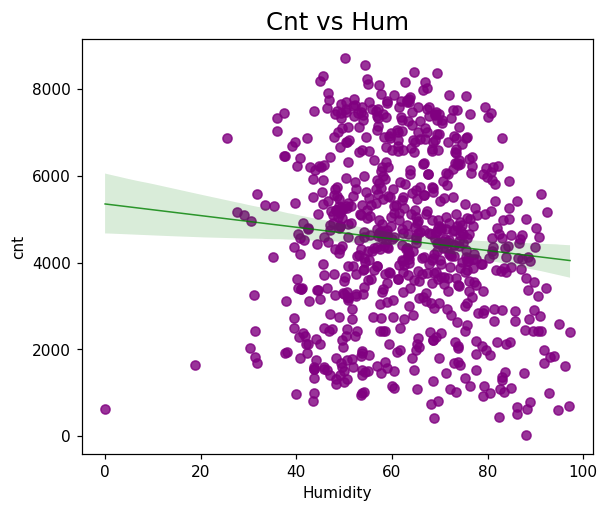

In [38]:
#Visualization of Cnt vs Humidity
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df_bikeSharing,y="cnt",x="hum",color="purple",line_kws={'color': 'green', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Humidity")
plt.show()

#### Observations

- We can observe that Hum values are more scattered around.
- We can also observe that cnt decreases with increase in humidity.

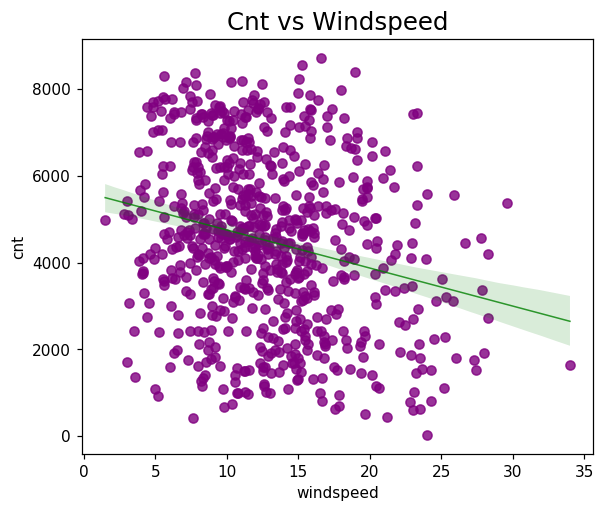

In [39]:
#Visualization of Cnt vs Windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df_bikeSharing,y="cnt",x="windspeed",color="purple",line_kws={'color': 'green', 'lw': 1, 'alpha': 0.8})
plt.show()


#### Observations

- We can obseerve that the Windspeed values are more scattered around.
- We can also observe that cnt decreases with increase in windspeed.

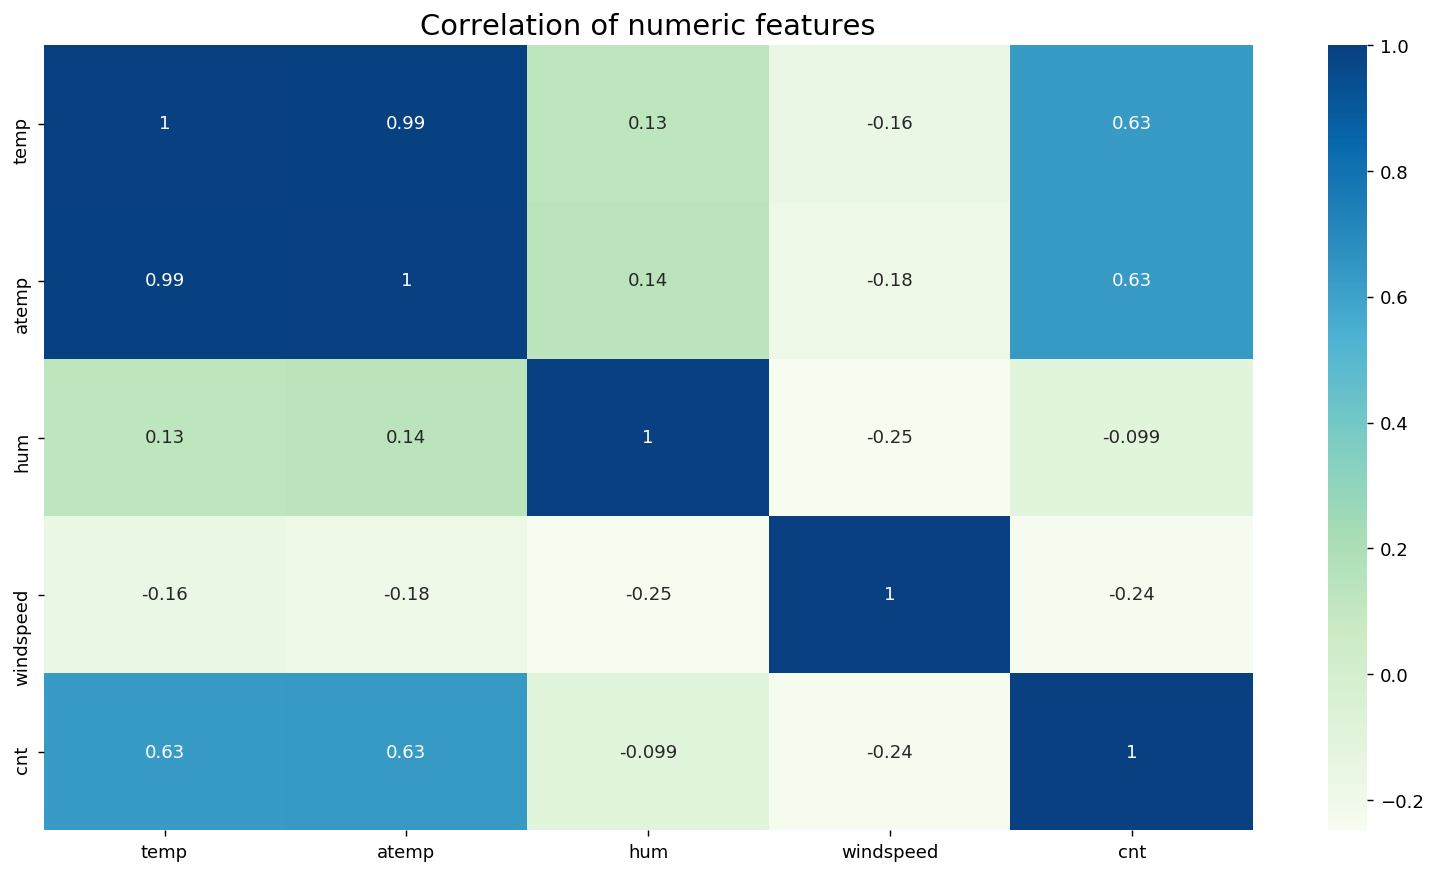

In [40]:
#Correlation of numeric features 
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df_bikeSharing[num_features].corr(),annot= True,cmap="GnBu")
plt.show()

#### Observations

- We can observe that Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- We can also observe that Temp and Atemp also have high correlation with cnt variable.
- We can observe that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so either temp or atemp field can be dropped, yet lets keep them for further analysis.

### Visualization of Categorical variables with target variables

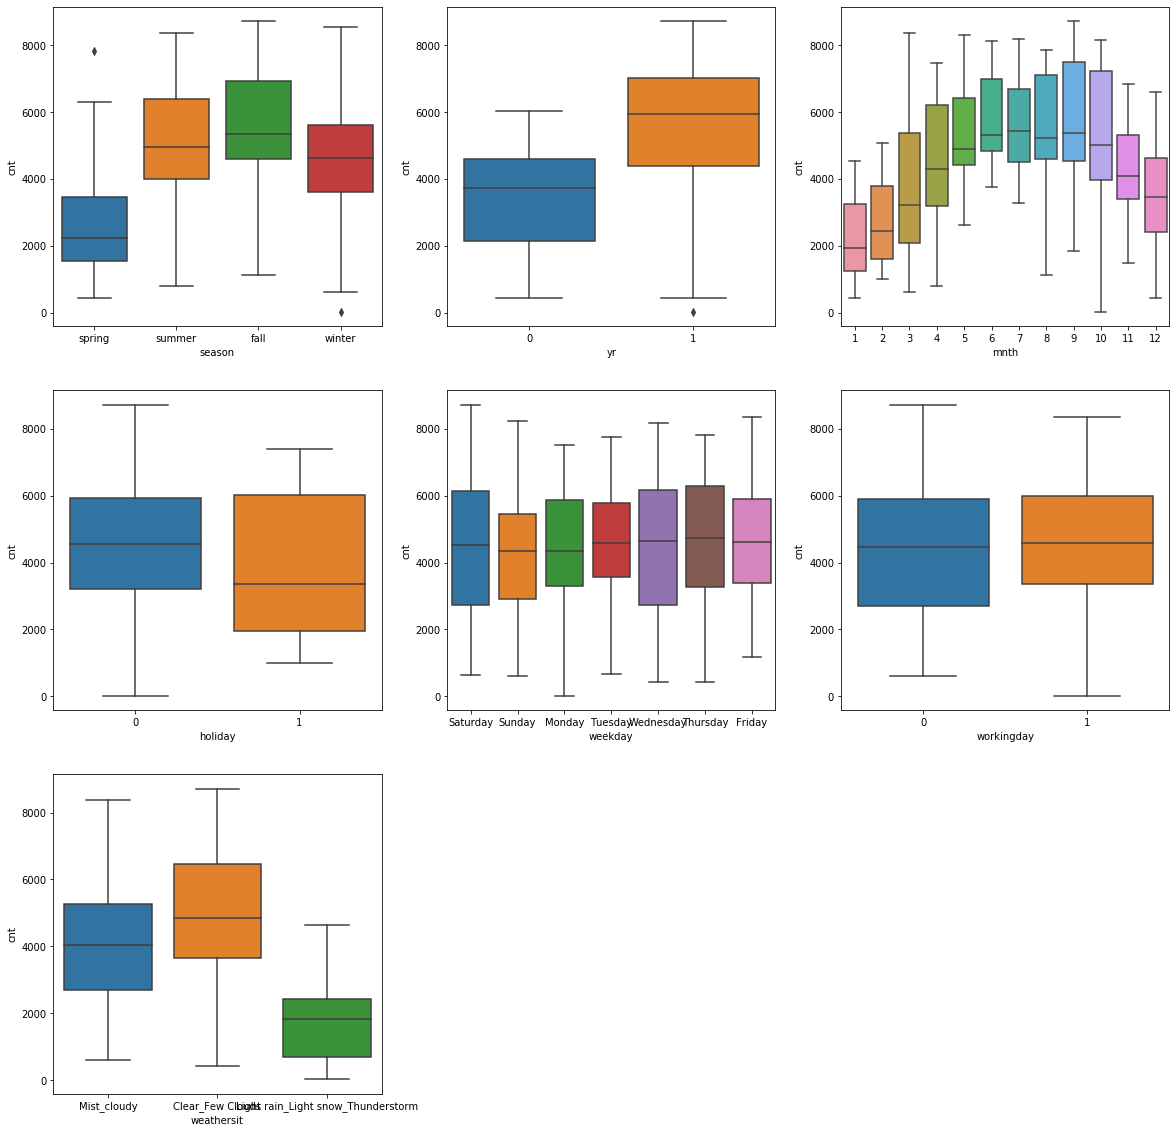

In [41]:
# Visualization of Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 20))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df_bikeSharing, x=i[1], y='cnt')
plt.show()

#### Observations

We can observe the following insights from the above visualization of plots,

- We can observe that Fall(Season 3) has the highest demand for rental bikes & seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019. 
- We can observe that the demand for next year has grown.
- We can observe that most of the bookings has been done during the month of 3, 5,  9 and 10. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Demand is continuously growing each month till month 6.Month 9 has highest demand. After month 9, the demand is decreasing.
- We can observe that when there is a holiday, demand has decreased.
- We can observe that Wednesday, Thursday, Friday & Saturday have more number of bookings as compared to the start of the week
- We can observe that Clear weather attracted a greater number of bookings which seems obvious.The clear & good weathershit has highest demand.
- We can observe that when it’s holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family. 
- We can observe that booking seemed to be almost equal either on working day or non-working day. 
- We can observe that 2019 attracted a greater number of bookings from the previous year, which shows good progress in terms of business. 


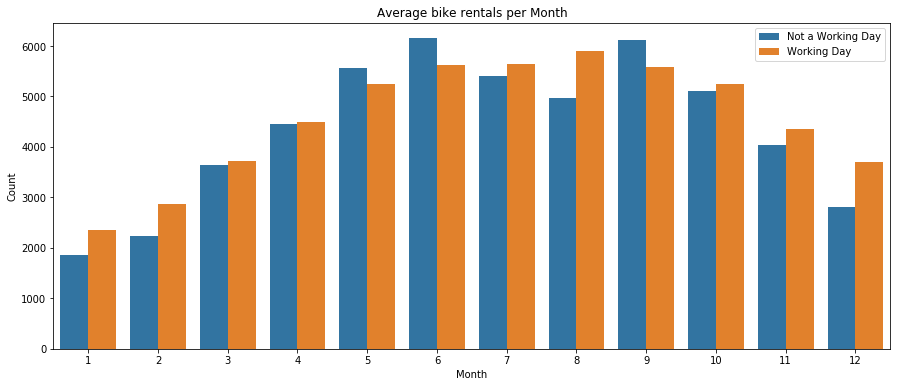

In [42]:
# Visualization of Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(df_bikeSharing.groupby(['mnth', 'workingday'])['cnt'].mean()).reset_index()
sns.barplot(data=group_month, x='mnth', y='cnt', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

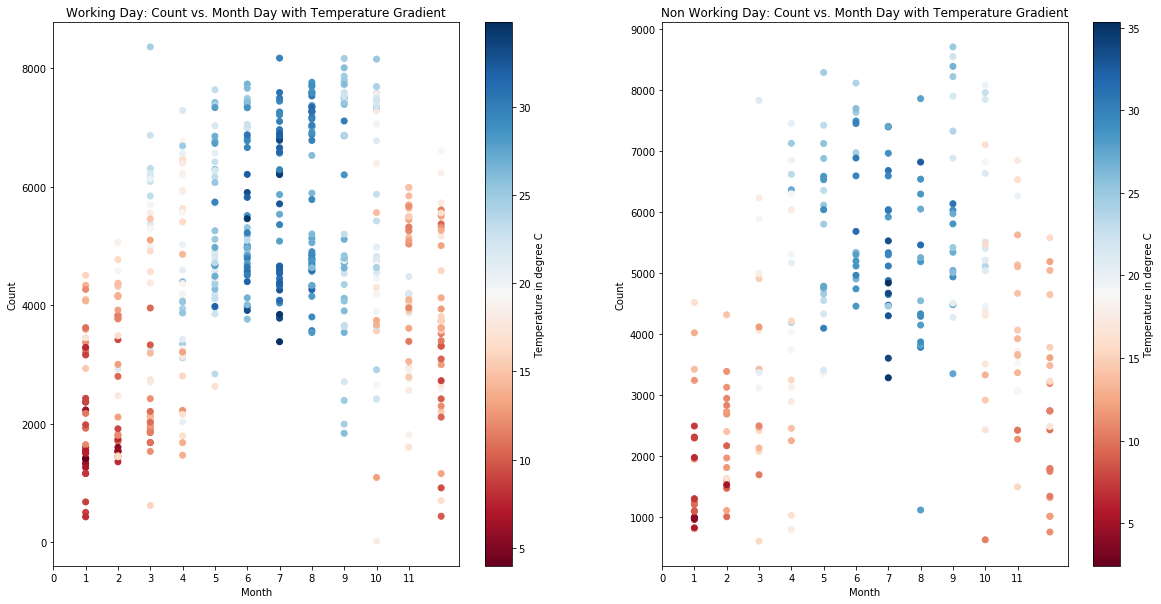

In [43]:
mydata_w = df_bikeSharing[df_bikeSharing.workingday==1]
mydata_nw = df_bikeSharing[df_bikeSharing.workingday==0]

fig = plt.figure(figsize=(20, 10))
# Working Day
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(mydata_w.mnth, mydata_w['cnt'], c=mydata_w.temp, cmap = 'RdBu')
axes.set(xticks = range(12), xlabel='Month', ylabel='Count', title='Working Day: Count vs. Month Day with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# Non Working Day
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(mydata_nw.mnth, mydata_nw['cnt'], c=mydata_nw.temp, cmap = 'RdBu')
axes.set(xticks = range(12), xlabel='Month', ylabel='Count', title='Non Working Day: Count vs. Month Day with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

plt.show()

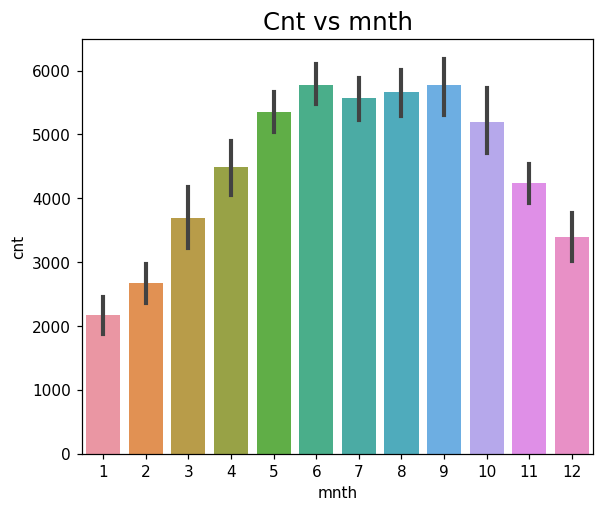

In [44]:
#Visualization of Cnt vs Month
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs mnth",fontsize=16)
sns.barplot(x="mnth", y="cnt", data=df_bikeSharing)
plt.show()

#### Observations

- We can observe a rise in number of riders from the month 4 to month 10.

In [45]:
df_bikeSharing.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## PREPARATION OF DATA FOR LINEAR REGRESSION

### Convertion of variables to object type

In [46]:
#Convertion of variables to object type
df_bikeSharing['mnth']=df_bikeSharing['mnth'].astype(object)
df_bikeSharing['season']=df_bikeSharing['season'].astype(object)
df_bikeSharing['weathersit']=df_bikeSharing['weathersit'].astype(object)
df_bikeSharing['weekday']=df_bikeSharing['weekday'].astype(object)
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Observations
- We can obseve that there are 

  - **4 features of float type**
  - **4 features of integer type**
  - **4 features of object type**

### Creation of dummy variables for all categorical variables
- drop_first = True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables. 


In [47]:
#Creation of Dummy Variables for categorical data 
Season_condition=pd.get_dummies(df_bikeSharing['season'],drop_first=True)
Weather_condition=pd.get_dummies(df_bikeSharing['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df_bikeSharing['weekday'],drop_first=True)
Month=pd.get_dummies(df_bikeSharing['mnth'],drop_first=True)

#### Observations

- We can obsereve that Dropping the first columns as (p-1) dummies can explain p categories.
- We can also observe that, in weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [48]:
df_bikeSharing=pd.concat([df_bikeSharing,Season_condition],axis=1)
df_bikeSharing=pd.concat([df_bikeSharing,Weather_condition],axis=1)
df_bikeSharing=pd.concat([df_bikeSharing,Day_of_week],axis=1)
df_bikeSharing=pd.concat([df_bikeSharing,Month],axis=1)
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   temp                                730 non-null    float64
 8   atemp                               730 non-null    float64
 9   hum                                 730 non-null    float64
 10  windspeed                           730 non-null    float64
 11  cnt                                 730 non-n

In [49]:
#Deleting the orginal features season.weathersit,weekday,mnth
df_bikeSharing.drop(['season'],axis=1,inplace=True)
df_bikeSharing.drop(['weathersit'],axis=1,inplace=True)
df_bikeSharing.drop(['weekday'],axis=1,inplace=True)
df_bikeSharing.drop(['mnth'],axis=1,inplace=True)
df_bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## SPLIT THE DATASET INTO TRAIN DATA & TEST DATA

In [50]:
#Now our data is ready to split
# We specify this so that the train and test dataset always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
#Have a look at the Train data
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,1,0,0,0,0,0,0,0,0


In [52]:
#Have a look at the Test data
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [53]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                     'temp',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
          

## FEATURE SCALING

- Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. 


In [54]:
#Scaling the data
scaler=MinMaxScaler()

In [55]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,0


In [57]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,7.431169,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
#Creation of X & Y
y_train = df_train.pop('cnt')
X_train = df_train

In [59]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## USING RFE APPROACH FOR FEATURE SELECTION

- Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [61]:
#Using RFE approach for feature selection

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', False, 13),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 12),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 14),
 ('Tuesday', False, 11),
 ('Wednesday', False, 15),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 8),
 (12, False, 9)]

In [63]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['workingday',       'temp',     'summer',     'Monday',   'Saturday',
           'Sunday',   'Thursday',    'Tuesday',  'Wednesday',            2,
                  7,           10,           11,           12],
      dtype='object')

In [65]:
X_train_rfe = X_train[col]

## MODEL BUILDING

#### Model 1

In [66]:
#Building model using statsmodel:
import statsmodels.api as sm  
#Addition of a constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [67]:
#Creation of a fit model
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [68]:
#Print a summary of the linear regression model obtained
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          8.06e-186
Time:                        13:54:01   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [69]:
#VIF Check
#To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creation of a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [70]:
X_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


#### MODEL 2

- Removing the variable 'hum' based on its Very High 'VIF' value.

In [71]:
#Column hum has a very high VIF so we drop it 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [72]:
#Addition of a constant
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [73]:
#Creation of a fit model
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [74]:
#Print a summary of the linear regression model obtained
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.75e-183
Time:                        13:54:02   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [75]:
#VIF Check
#To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creation of a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


#### Observation

- We can observe that the removal of hum which had very high VIF value improves the model

#### Model 3
- Adding Sunday to check if the model improves

In [76]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [77]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9,Sunday
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,1,0,0,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0.391735,0.188475,0,0,0,1,0,1,0,0,0,0,0


In [78]:
#Addition of a constant
X_train_rfe3 = sm.add_constant(X_train_rfe)
#Creation of a fit model
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
#Print a summary of the linear regression model obtained
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          9.94e-186
Time:                        13:54:02   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -980.8
Df Residuals:                     494   BIC:                            -913.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [79]:
#VIF Check
#To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creation of a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.35
3,windspeed,4.56
4,spring,2.12
0,yr,2.08
5,winter,1.99
12,8,1.87
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.56
9,4,1.54


#### Observation

- We can observe that the addition of Sunday has low p-value, VIF & thus improves the model. 

#### Model 4

- Adding workingday to check if the model improves

In [80]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9,Sunday,workingday
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0.438975,0.255342,1,0,0,1,1,0,0,0,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0.391735,0.188475,0,0,0,1,0,1,0,0,0,0,0,0


In [81]:
#Addition of a constant
X_train_rfe4 = sm.add_constant(X_train_rfe)
#Creation of a fit model
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
#Print a summary of the linear regression model obtained
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     162.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          8.09e-185
Time:                        13:54:02   Log-Likelihood:                 506.94
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     493   BIC:                            -907.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [82]:
#workingday has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

#### Observation

- We can observe that the varible Workingday has very high p-value.

#### Model 5
- Removing the variable 'workingday' based on its Very High  p-value.

In [83]:
#Addition of a constant
X_train_rfe5 = sm.add_constant(X_train_rfe)
#Creation of a fit model
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
#Print a summary of the linear regression model obtained
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          9.94e-186
Time:                        13:54:02   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -980.8
Df Residuals:                     494   BIC:                            -913.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [84]:
#VIF Check
#To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creation of a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.35
3,windspeed,4.56
4,spring,2.12
0,yr,2.08
5,winter,1.99
12,8,1.87
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.56
9,4,1.54


#### Observations
- Thus removal of the variable 'workingday' based on its Very High p-value, improves the model

#### Model 6
- Removal of month 4 to check if the model improves

In [85]:
#Removal of month 4 to check if the model improves
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [86]:
#Addition of a constant
X_train_rfe6 = sm.add_constant(X_train_rfe)
#Creation of a fit model
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
#Print a summary of the linear regression model obtained
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.3
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          5.67e-185
Time:                        13:54:02   Log-Likelihood:                 501.90
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     495   BIC:                            -910.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [87]:
#VIF Check
#To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creation of a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.14
3,windspeed,3.95
0,yr,2.05
4,spring,1.84
5,winter,1.67
11,8,1.67
7,Mist_cloudy,1.54
10,6,1.49
9,5,1.43
12,9,1.36


#### Model 7
- Removal of month 8 to check if the model improves

In [88]:
X_train_rfe=X_train_rfe.drop([8],axis=1)

In [89]:
#Addition of a constant
X_train_rfe7 = sm.add_constant(X_train_rfe)
#Creation of a fit model
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
#Print a summary of the linear regression model obtained
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          4.03e-185
Time:                        13:54:02   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Model 8
- Month 6 has a very high p-value & it is insignificant. Therefore we drop it.

In [90]:
#Month 6 has a very high p-value & it is insignificant. Therefore we drop it.
X_train_rfe=X_train_rfe.drop([6],axis=1)

In [91]:
#Addition of a constant
X_train_rfe8 = sm.add_constant(X_train_rfe)
#Creation of a fit model
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
#Print a summary of the linear regression model obtained
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          9.99e-186
Time:                        13:54:02   Log-Likelihood:                 498.16
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     497   BIC:                            -915.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [92]:
#VIF Check
#To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creation of a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.94
3,windspeed,3.93
0,yr,2.05
4,spring,1.79
7,Mist_cloudy,1.53
5,winter,1.45
8,3,1.26
9,5,1.22
10,9,1.19
11,Sunday,1.18


#### Model 9
- Addition of month 10 to check if model improves

In [93]:
#Addition of month 10 to check if model improves
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,yr,holiday,atemp,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,9,Sunday,10
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,1
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,0,0,0


In [94]:
#Addition of a constant
X_train_rfe9 = sm.add_constant(X_train_rfe)
#Creation of a fit model
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
#Print a summary of the linear regression model obtained
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.5
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          4.51e-186
Time:                        13:54:02   Log-Likelihood:                 501.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     496   BIC:                            -916.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [95]:
#VIF Check
#To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creation of a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.98
3,windspeed,3.94
0,yr,2.05
5,winter,1.95
4,spring,1.79
12,10,1.59
7,Mist_cloudy,1.53
8,3,1.26
9,5,1.22
10,9,1.21


#### Observations

We can observe the followings from the above model:

-  VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.837
- Hence, Let us select Model 9 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
- Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

## VALIDATION OF THE ASSUMPTION OF LINEAR REGRESSION 

### Residual Analysis

In [96]:
#Predict values
y_train_cnt = lm9.predict(X_train_rfe9)

In [97]:
#Calculating Residuals
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

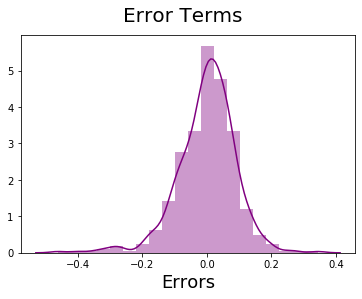

In [98]:
#Checking assumption of Normality:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20,color='purple')
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observations

- We can observe that the errors are normally distribured here with mean 0.

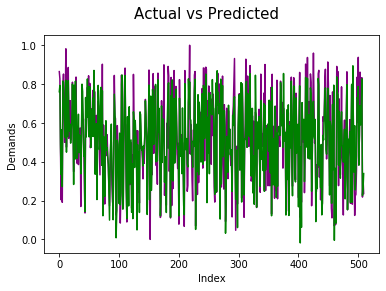

In [99]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="purple")
plt.plot(c,y_train_cnt, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Observations

- We can observe that the actual and predicted result following almost the same pattern.

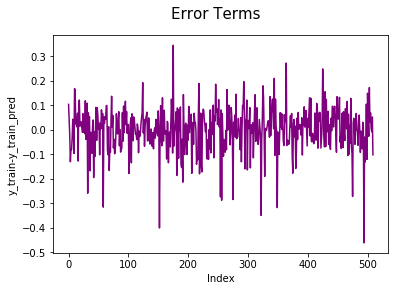

In [100]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_cnt, color="purple")
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Observations

- We can observe that the error terms are independent of each other.

In [101]:
#Checking features
X_train_rfe9.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                    'atemp',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          9,
                                   'Sunday',
                                         10],
      dtype='object')

In [102]:
print(X_train_rfe9.shape)
print(res.shape)

(510, 14)
(510,)


### Multi Colinearity

In [103]:
#VIF Check
#To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creation of a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.98
3,windspeed,3.94
0,yr,2.05
5,winter,1.95
4,spring,1.79
12,10,1.59
7,Mist_cloudy,1.53
8,3,1.26
9,5,1.22
10,9,1.21


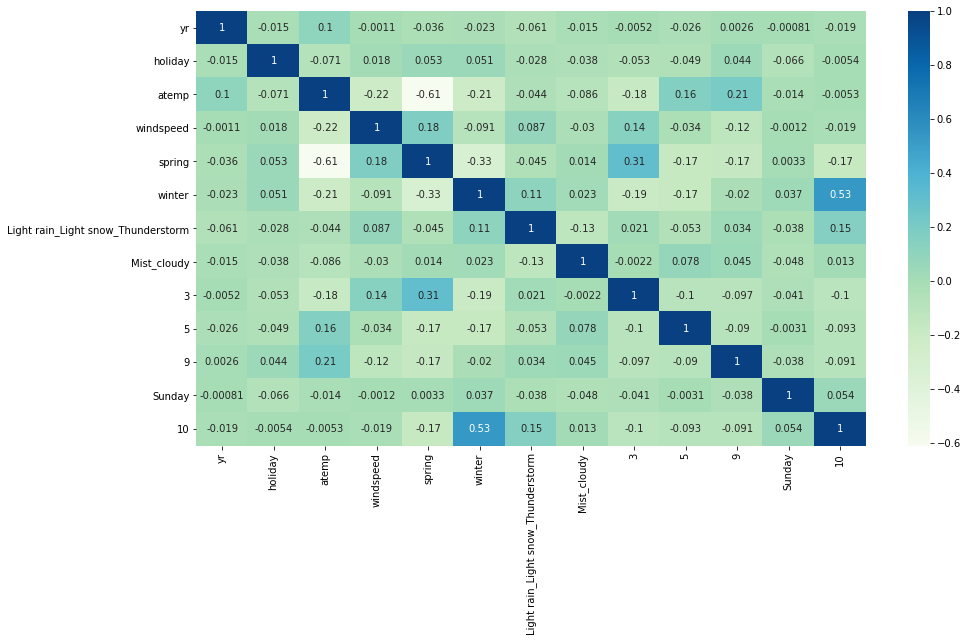

In [104]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="GnBu")
plt.show()

#### Observations

- We can observe that the VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linearity Check

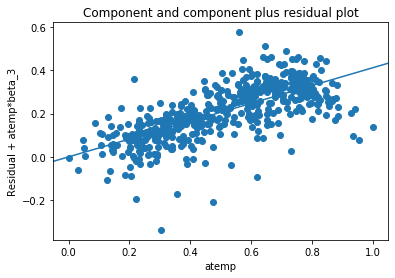

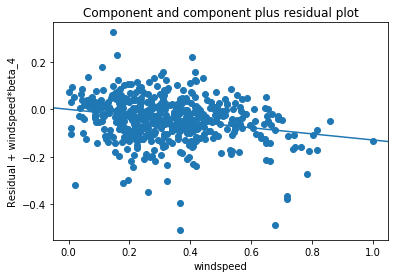

In [105]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm9, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lm9, 'windspeed')
plt.show()

#### Observations

- We can observe linearity from the above visualizations

### Homoscedacity

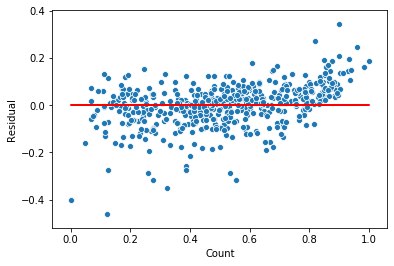

In [106]:
# scatter plot for the check
residual = (y_train - y_train_cnt)
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Observations

- We can observe that there is no visible patterns from the above plot for residuals

### Independence of residuals

- Durbin-Watson value of final model lm9 is 2.057, which signifies there is no autocorrelation.

#### Observations
Thus the Residual analysis is performed after model building and the assumptions are validated by the followings:

- Normality of error terms 
    - Error terms should be normally distributed
- Multicollinearity check 
    - There should be insignificant multicollinearity among variables. 
- Linear relationship validation 
    - Linearity should be visible among variables 
- Homoscedasticity 
    - There should be no visible pattern in residual values. 
- Independence of residuals 
    - No auto-correlation 


## MAKING PREDICTIONS

In [107]:
#Predict values
y_train_cnt = lm9.predict(X_train_rfe9)

In [108]:
#Scaling the test data
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [109]:
#Creating x and y sets
y_test = df_test.pop('cnt')
X_test = df_test

In [110]:
X_train_new=X_train_rfe9.drop(['const'], axis=1)

In [111]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [112]:
X_train_rfe9.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                    'atemp',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          9,
                                   'Sunday',
                                         10],
      dtype='object')

In [113]:
#Making predictions on the chosen model
y_pred = lm9.predict(X_test_new)

### R-Squared value for test predictions

In [114]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.0921049931797674

In [115]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.8213878213883095

#### Observations
- Thus the R-squared score on the test set 0.821 (82.1%)

## EVALUATION OF THE MODEL

Text(0, 0.5, 'y_pred')

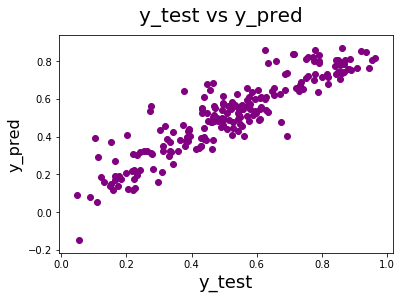

In [116]:
#Checking predicted V/s test data 

fig = plt.figure()
plt.scatter(y_test,y_pred,color='purple')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Observations

- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes

### Visualization of Test vs Predicted test values

In [117]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="purple", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="green",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted data - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)

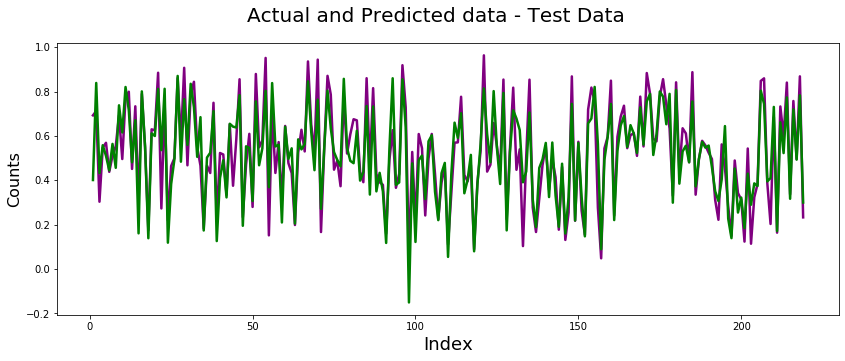

In [118]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')

#### Observations

- We can observe predictions for test data is very close to actuals

### Visualization of Error Terms for test data

In [119]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="purple", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

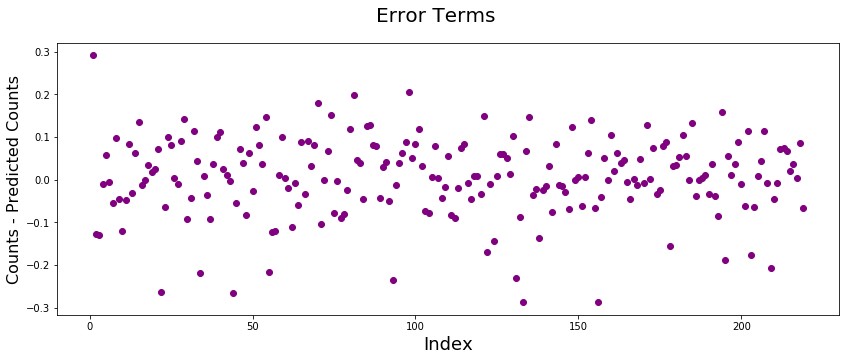

In [120]:
#Plot error terms for test data
plot_err_terms(y_test,y_pred)

#### Observations

- we can observe that the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [121]:
X_t=X_train_new.iloc[:,0].values

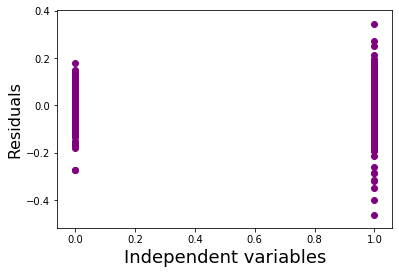

In [122]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res,color='purple')
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### Observations

- When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [123]:
X_train_new.head()

,yr,holiday,atemp,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,9,Sunday,10
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,1
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,0,0,0


In [124]:
print(X_train_rfe9.columns)
print(lm9.summary())

Index([                             'const',
                                       'yr',
                                  'holiday',
                                    'atemp',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          9,
                                   'Sunday',
                                         10],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.5
Date:                Sun, 12 Ju

## INFERENCE

#### Hypothesis Testing
  
- Hypothesis testing states that:

    - H0: B1=B2=...=Bn=0

    - H1: at least one Bi!=0
    
- From the final model summary, we can observe & it is evident that all our coefficients are not equal to zero which ensures that we reject the null hypothesis.

#### F Statistics
  
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

     - F-statistic: 196.5

     - Prob (F-statistic):  4.51e-186

- The F-Statistics value of 196.5 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

#### Interpretation of Coefficients:

- atemp: A coefficient value of ‘0.4120’ indicated that a unit increase in atemp variable, increases the bike hire numbers by 0.4120 units.
- windspeed: A coefficient value of ‘-0.1293’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1293 units.
- yr: A coefficient value of ‘0.2372’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2372 units.
- winter: A coefficient value of ‘0.0341’ indicated that, a unit increase in winter variable increases the bike hire numbers by 0.0341 units.
- spring: A coefficient value of ‘-0.1237’ indicated that, a unit increase in spring variable decreases the bike hire numbers by 0.1237 units.
- month 10: A coefficient value of ‘0.0472’ indicated that with respect to month 1, a unit increase in 10 variable increases the bike hire numbers by 0.0472 units.
- Mist_cloudy: A coefficient value of ‘-0.0844’ indicated that, a unit increase in Mist_cloudy variable, decreases the bike hire numbers by 0.0844 units.
- month 3: A coefficient value of ‘0.0388’ indicated that with respect to month 1, a unit increase in month 3 variable increases the bike hire numbers by  0.0388  units.
- month 5: A coefficient value of ‘0.0398’ indicated that with respect to month 1, a unit increase in month 5 variable increases the bike hire numbers by 0.0398  units.
- month 9: A coefficient value of ‘0.0823’ indicated that with respect to month 1, a unit increase in month 9 variable increases the bike hire numbers by 0.0823 units.
- Sunday: A coefficient value of ‘-0.0499’ indicated that, a unit increase in Sunday variable, decreases the bike hire numbers by 0.0499 units.
- Light rain_Light snow_Thunderstorm: A coefficient value of ‘-0.2988’ indicated that, a unit increase in Light rain_Light snow_Thunderstorm variable, decreases the bike hire numbers by 0.2988 units.
- holiday: A coefficient value of ‘-0.0950’ indicated that, a unit increase in holiday variable decreases the bike hire numbers by 0.0950 units.
- const: The Constant value of ‘0.2743’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.2743 units.


## CONCLUSION

#### The equation of best fitted surface based on the model 

cnt = 0.2743  + (yr × 0.2372)  - (0.0950 X holiday) + (0.4120 X atemp) - (0.1293 X Windspeed) - (0.1237 X Spring) + (0.0341 X winter) - (0.2988 X Light rain_Light snow_Thunderstorm) - (0.0844 X Mist_Cloudy) + (0.0388 X 3) + (0.0398 X 5) + (0.0823 X 9) - (0.0499 X Sunday) + (0.0472 X 10)


- Significant variables to predict the demand for shared bikes
   
   - atemp
   - Season(Spring, Winter)
   - months(3, 5, 9, 10)
   - holiday
   - windspeed 
   - Year (2019)
   - Sunday
   - weathersit(Light rain_Light snow_Thunderstorm, Mist_cloudy)
  

- The model has a good R^2 score of 0.821 on the test data, which means that 82.1% of the variation in total number of bike rentals can be explained by the variables in the linear regression model built. Hence, the model well justifies the data, and can be used for decision making.   

#### From the analysis of the above model, we can ensure that the comapany should focus on the following features:

- Company should focus on expanding business during Spring.
- Company should focus on expanding business during the month of 9.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
- Demands increases in the month of 3, 5, 9, 10 and yr
- Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday

Therefore, when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for the month of 9 as this is when business would be at its best.